# Bibliotecas

In [34]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Junção de database 1 e 2

In [39]:
train = pd.read_csv('train_database1.csv')
test = pd.read_csv('test.csv')
ts = pd.read_csv('time_series_features.csv')

In [40]:
# Junção dos dois datasets pelo 'id'
data_train = pd.merge(train, ts, on='id', how='left')
data_test = pd.merge(test, ts, on='id', how='left')


# Modelo

In [42]:
# Separar as features (X) e o target (y)
X_train = data_train.drop(columns=['id','sii','PCIAT-PCIAT_Total'])  # Substitua 'target' pelo nome da sua coluna alvo
y_train = data_train['sii']

X_test = data_test.drop(columns=['id','sii','PCIAT-PCIAT_Total'])
y_test = data_test['sii']


c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:13:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia: 0.92

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       478
         1.0       0.83      0.89      0.86       219
         2.0       0.90      0.85      0.87       114
         3.0       1.00      0.80      0.89        10

    accuracy                           0.92       821
   macro avg       0.92      0.87      0.90       821
weighted avg       0.92      0.92      0.92       821



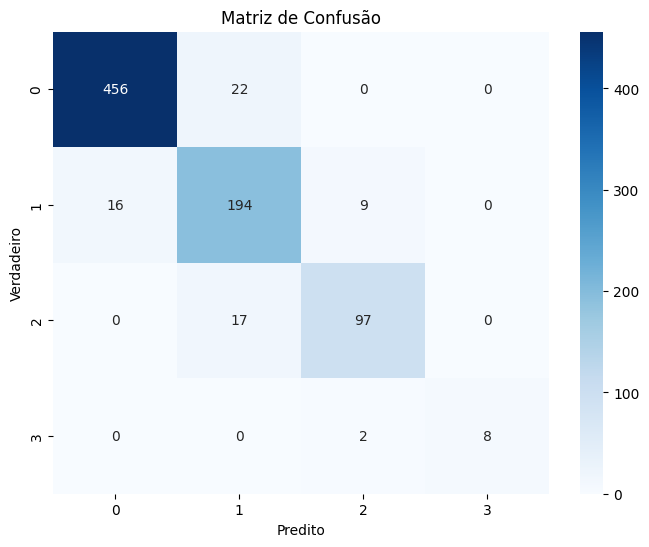

In [59]:
# Criar o modelo XGBoost
model = XGBClassifier(n_estimators=200,
                        max_depth=3,
                        learning_rate=0.1,
                        subsample=0.8,
                        random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss'
                    )  

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}\n")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Configuração do Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Lista para armazenar os resultados dos folds
fold_accuracies = []

for train_index, val_index in skf.split(X_train, y_train):
    # Divisão do treino e validação dentro do conjunto de treinamento
    X_train_fold, X_val_fold = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Treine o modelo com o fold atual
    model = XGBClassifier(
                        n_estimators=200,
                        max_depth=3,
                        learning_rate=0.1,
                        subsample=0.8,
                        random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss'
                    )  # Ex.: Modelo de classificação
    model.fit(X_train_fold, y_train_fold)
    
    # Avaliação no conjunto de validação (fold atual)
    y_val_pred = model.predict(X_val_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_accuracies.append(fold_accuracy)

# Resultado médio dos folds
print(f"Acurácia média nos folds: {sum(fold_accuracies) / len(fold_accuracies)}")

# Avaliação final no conjunto de teste
y_test_pred = model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste: {final_accuracy}")


c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Acurácia média nos folds: 0.9336814621409921
Acurácia no conjunto de teste: 0.9159561510353228


In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Parâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Configuração do Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Lista para armazenar os resultados
results = []

# Grid search manual
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for subsample in param_grid['subsample']:
                fold_accuracies = []  # Para armazenar as acurácias de cada fold
                
                # Validação cruzada
                for train_index, val_index in skf.split(X_train, y_train):
                    # Divisão do treino e validação dentro do conjunto de treinamento
                    X_train_fold, X_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
                    
                    # Treine o modelo com os hiperparâmetros atuais
                    model = XGBClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss'
                    )
                    model.fit(X_train_fold, y_train_fold)
                    
                    # Avaliação no conjunto de validação
                    y_val_pred = model.predict(X_val_fold)
                    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
                    fold_accuracies.append(fold_accuracy)
                
                # Média de acurácia para os folds
                mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
                
                # Armazene os resultados
                results.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'learning_rate': learning_rate,
                    'subsample': subsample,
                    'mean_accuracy': mean_accuracy
                })

# Encontre os melhores parâmetros
best_result = max(results, key=lambda x: x['mean_accuracy'])
print(f"Melhores parâmetros: {best_result}")


c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:02:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:02:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:02:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Melhores parâmetros: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'mean_accuracy': 0.9336814621409921}


In [71]:
import kerastuner as kt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Divisão adicional para criar validação para o Keras Tuner
X_train_tuner, X_val_tuner, y_train_tuner, y_val_tuner = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Função de construção do modelo para o Keras Tuner
def build_model(hp):
    # Hiperparâmetros ajustáveis
    n_estimators = hp.Int('n_estimators', min_value=50, max_value=300, step=50)
    max_depth = hp.Int('max_depth', min_value=3, max_value=10, step=1)
    learning_rate = hp.Float('learning_rate', min_value=0.01, max_value=0.3, step=0.01)
    subsample = hp.Float('subsample', min_value=0.5, max_value=1.0, step=0.1)

    # Criação do modelo com os hiperparâmetros ajustáveis
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    return model

# Função de avaliação para o Keras Tuner
def model_tuner(hp):
    # Constrói o modelo com os hiperparâmetros fornecidos
    model = build_model(hp)

    # Treina o modelo no conjunto de treino
    model.fit(
        X_train_tuner,
        y_train_tuner,
        eval_set=[(X_val_tuner, y_val_tuner)],
        verbose=False,
        early_stopping_rounds=10
    )

    # Previsões no conjunto de validação
    y_val_pred = model.predict(X_val_tuner)
    accuracy = accuracy_score(y_val_tuner, y_val_pred)

    # Retorna a métrica que o tuner irá otimizar
    return accuracy

# Configuração do tuner
tuner = kt.Hyperband(
    model_tuner,
    objective='val_accuracy',
    max_epochs=10,
    directory='tuner_results',
    project_name='xgboost_tuning'
)

# Execução da busca de hiperparâmetros
tuner.search(X_train_tuner, y_train_tuner, validation_data=(X_val_tuner, y_val_tuner), verbose=1)

# Melhores hiperparâmetros encontrados
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Exibe os melhores valores encontrados
print(f"Melhores parâmetros encontrados: n_estimators={best_hps.get('n_estimators')}, "
      f"max_depth={best_hps.get('max_depth')}, learning_rate={best_hps.get('learning_rate')}, "
      f"subsample={best_hps.get('subsample')}")

# Treine o modelo final com os melhores hiperparâmetros
best_model = build_model(best_hps)
best_model.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_test_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste: {final_accuracy}")


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divisão de treino e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Inicializa o modelo
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Ajusta o modelo com early stopping
model.fit(
    X_train_split,
    y_train_split,
    #eval_set=[(X_val_split, y_val_split)],  # Conjunto de validação
    #early_stopping_rounds=10,              # Número de rounds para parar antecipadamente
    verbose=True                           # Exibe informações sobre o treinamento
)

# Previsão no conjunto de validação
y_val_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Acurácia no conjunto de validação: {accuracy}")


c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia no conjunto de validação: 0.9373368146214099


In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divisão do conjunto de dados em treino, validação e teste
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_split, y_train_split, test_size=0.25, random_state=42, stratify=y_train_split
)

# Inicializa o modelo
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Ajusta o modelo com early stopping no conjunto de validação
model.fit(
    X_train_split,
    y_train_split,
    #eval_set=[(X_val_split, y_val_split)],  # Conjunto de validação
    #early_stopping_rounds=10,              # Número de rounds para parar antecipadamente
    verbose=True                           # Exibe informações sobre o treinamento
)

# Previsão no conjunto de validação
y_val_pred = model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Acurácia no conjunto de validação: {val_accuracy}")

# Previsão no conjunto de teste
y_test_pred = model.predict(X_test_split)
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy}")

# Exibe os hiperparâmetros utilizados
print("Hiperparâmetros utilizados no modelo:")
print(model.get_params())


c:\Users\Elke\Desktop\TCC\tcc-eng-mecatronica-ufrn\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia no conjunto de validação: 0.9216710182767625
Acurácia no conjunto de teste: 0.8720626631853786
Hiperparâmetros utilizados no modelo:
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate